<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/Classificador_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from tensorflow import keras

## Ejemplo: clasificador de imágenes usando Keras

Para ilustrar la manera en que Keras es usado en el aprendizaje profundo, realizaremos un ejemplo de clasificación usando conjunto de datos *Fashion MNIST* el cual consta de 70,000 imágenes (las imágenes representan artículos de moda) en escala de grises de 28 × 28 píxeles cada una y con 10 clases. 

### Uso de Keras para cargar el conjunto de datos

Comencemos cargando el conjunto de datos Fashion MNIST. Keras tiene una serie de funciones para cargar conjuntos de datos populares en keras.datasets. El conjunto de datos ya está dividido entre un conjunto de entrenamiento y un conjunto de prueba, pero puede ser útil dividir aún más el conjunto de entrenamiento para tener un conjunto de validación:






In [84]:
from keras.datasets import fashion_mnist

In [85]:
fashion_mnist = keras.datasets.fashion_mnist #cargo datos
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() #devueve dos tuplas

El conjunto de entrenamiento contiene 60,000 imágenes en escala de grises, cada una de 28x28 píxeles. Visualiza el tamaño del conjunto en la siguiente celda:

In [86]:
X_train_full.shape

(60000, 28, 28)

La intensidad de cada píxel se representa como un byte (enteros entre 0 a 255):

In [87]:
X_train_full.dtype

dtype('uint8')

A continuación visualiza utilizando `matplotlib` el primer elemento del conjunto de entrenamiento (visualiza la matrix de valores) y comprueba el valor máximo y mínimo con una "*colorbar*". Además calcula de manera analítica los valores máximo y mínimo de la matriz.

In [88]:
import matplotlib.pyplot as plt 
# import seaborn as sns; sns.set()

255
0
255


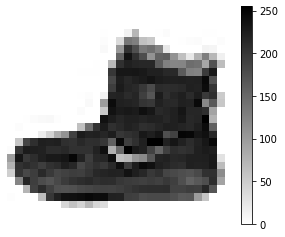

In [89]:
plt.imshow(X_train_full[0,:,:], cmap='binary') #imshow pq es imagen
plt.axis('off')
plt.colorbar()
print(X_train_full[0].max())
print(X_train_full[0].min())
print(X_train_full.max()) #max de toda la matriz

**Ahora** dividamos el conjunto de datos de entrenamiento en un conjunto de validación y un conjunto de entrenamiento (más pequeño). También escalamos las intensidades de píxeles en el rango 0-1 y las convertimos en flotantes al dividiéndolas por 255.

In [90]:
#cogemos los 5000 primeros para valida y los restantes para el entrenamiento
X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.

#si tengo datos de pacientes a los largo del tiempo, habría que hacer un random sampling

y_valid, y_train = y_train_full[5000:], y_train_full[5000:]

X_test = X_test/255.

In [91]:
X_train.shape #más datos de entrenamiento que validación

(55000, 28, 28)

Visualicemos de nuevo la primera imagen del conjunto de datos usando y calculemos el máximo y mínimo para comprobar que hemos escalado bién. Comprueba además que los datos son de tipo `float`

1.0
0.0


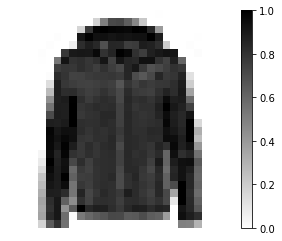

In [92]:
plt.imshow(X_train[0,:,:], cmap='binary')
plt.axis('off')
plt.colorbar()
print(X_train.max())
print(X_train.min())

Las etiquetas van de 0 a 9, por lo que hay 10 tipos diferentes de ropa. Comprueba analitacamente que efectivamente, el vector `y_train` solamente tiene valores entre 0 y 9.

In [93]:
import numpy as np

In [94]:
np.unique(y_train) #compruebo los valores únicos de y_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Los nombres para cada una de las clases anteriores son: 

In [95]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Por lo tanto, la clase 0 se corresponde con "T-shirt/top", la clase 1 con "Trouser" y así sucesivamente.

Comprueba que la primera imagen en el conjunto de entrenamiento es un abrigo (Coat)

In [96]:
class_names[y_train[0]]

'Coat'

El conjunto de validación contiene 5,000 imágenes, y el conjunto de test contiene 10,000 imágenes. Comprueba las dimensiones de dichos conjuntos.

In [97]:
X_valid.shape

(5000, 28, 28)

In [98]:
X_test.shape

(10000, 28, 28)

visualicemos ahora algunas de las imágenes de los datos de entrenamiento con su respectiva etiqueta

ValueError: ignored

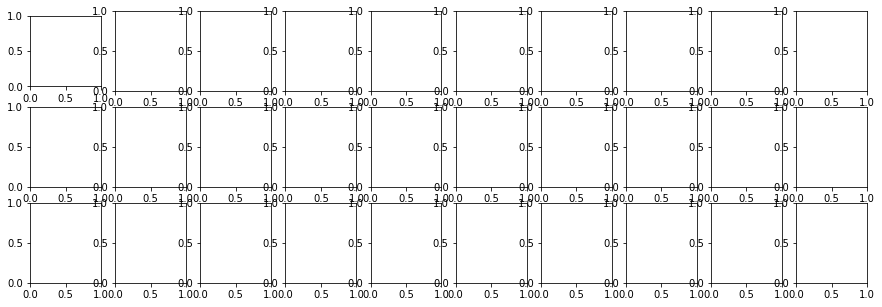

In [99]:
fig, ax = plt.subplots(3, 10, figsize=(15,5))
for i, ax in enumerate(ax.flat):
  ax.imshow(X_train[i], cmap='binay')
  ax.set_axis_off()
  ax.set_title(class_names(y_train[i]))

## Uso de Keras para crean un modelo de aprendizaje profundo 


In [100]:
keras.backend.clear_session()

Crea un modelo con la api de keras que tenga 2 capas ocultas de 300 y 100 neuronas respectivamente con función de activación *Relu*:

In [101]:
model = keras.models.Sequential()  #crear modelo
#secuencial o funcional?

#ahora añado las capas
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

# esto es equivalente a lo de arriba. en funcional
input = keras.layers.Input(shape=(28,28)) #datos entrada entran aquí

flatten = keras.layers.Flatten()(input) #datos van diretamente a flatten
#capa flatten 
hidden_1 = keras.layers.Dense(300,activation='relu')(flatten) #le indico q su entrada es flatten
hidden_2 = keras.layers.Dense(100,activation='relu')(hidden_1)
output = keras.layers.Dense(10,activation='softmax')(hidden_2)
model_2 = keras.Model(inputs=input, outputs=output)

Utiliza el método `summary()`para visualizar el resumen de las capas y parámetros del modelo creado.

In [102]:
model.summary() #resumen del modelo
#modelo secuancial
#capa flaten 784 = 24x24
#la coma es punto
#los entrenables son todos pq si tenemos capas congeladas estos no son entrenables
#en este caso trainble paramnss igual a total params

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Compilando el modelo

Después de crear un modelo, se debe llamar el método `compile()` para especificar la función de pérdida y el optimizador a utilizar. Opcionalmente, también puede especificar una lista de métricas  para calcular durante el entrenamiento y la evaluación:

In [103]:
#sparce_categorical_crossentropu
#'sgd'
#['accuracy']

model.compile(loss='sparse_categorycal_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

## Entrenando y evaluando el modelo

Ahora el modelo está listo para ser entrenado. Para esto simplemente necesitamos llamar a su método `fit()`. Le pasamos las características de entrada (X_train) y las clases de salida (y_train), así como la cantidad de épocas para entrenar (o de lo contrario, sería predeterminado a solo 1). También pasamos un conjunto de validación (esto es opcional): Keras medirá el `loss` y las métricas adicionales en este conjunto al final de cada época, lo cual es muy útil para ver qué cómo de bien se comporta el modelo realmente. Haz el `fit` del modelo y guárdalo en una variable llamada `history`

In [104]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


ValueError: ignored

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7203 - accuracy: 0.7656 - val_loss: 0.5158 - val_accuracy: 0.8256
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4896 - accuracy: 0.8275 - val_loss: 0.4638 - val_accuracy: 0.8378
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4452 - accuracy: 0.8433 - val_loss: 0.4161 - val_accuracy: 0.8592
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4191 - accuracy: 0.8520 - val_loss: 0.4453 - val_accuracy: 0.8428
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3977 - accuracy: 0.8598 - val_loss: 0.3847 - val_accuracy: 0.8654
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3816 - accuracy: 0.8662 - val_loss: 0.4108 - val_accuracy: 0.8510
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3677 - accuracy: 0.8702 - val_loss: 0.3682 - val_accuracy:

¡Y eso es todo! La red neuronal está entrenada. En cada época durante el entrenamiento, Keras muestra el número de instancias procesadas hasta el momento (junto con una barra de progreso), el tiempo medio de entrenamiento, la pérdida (loss) y la precisión (accuracy), ambas calculadas en el conjunto de entrenamiento y el conjunto de validación.

El método `fit()` devuelve un objeto "History" que contiene los parámetros de entrenamiento (history.params), la lista de épocas por las que pasó (history.epoch) y, lo más importante, un diccionario (history.history) que contiene el *loss* y las métricas adicionales que midió al final de cada época en el conjunto de entrenamiento y en el conjunto de validación (si corresponde). 

Visualiza las curvas de aprendizaje guardadas en la variable `history` (creada anteriormente).

In [71]:
import pandas as pd
df = pd.DataFrame(history.history)
df.head()

NameError: ignored

,loss,accuracy,val_loss,val_accuracy
0,0.720276,0.765618,0.515778,0.8256
1,0.489612,0.827473,0.463811,0.8378
2,0.445222,0.843291,0.416071,0.8592
3,0.419063,0.852000,0.445251,0.8428
4,0.397743,0.859800,0.384666,0.8654


In [72]:
df.plot(figsize=(8,5))

NameError: ignored

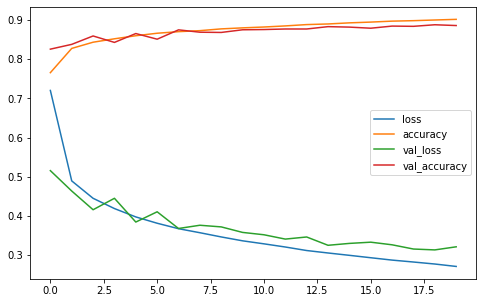

Se puede ver que tanto la precisión de entrenamiento como la de validación aumentan constantemente durante el entrenamiento, mientras que el *loss* de entrenamiento y validación disminuye. Ademas , las curvas de validación están bastante cerca de las curvas de entrenamiento, lo que significa que no hay demasiado sobreajuste (overfitting).

Ahora usemos el modelo ya entrenado sobre nuestros datos de prueba (X_test).

In [83]:
model.evaluate(X_test, y_test)

ValueError: ignored

313/313 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.8740


[0.3526138663291931, 0.8740000128746033]

## Usando el modelo para hacer predicciones

Ahora, podemos usar el método `predict()` para hacer predicciones sobre nuevas instancias. Como no tenemos instancias nuevas reales, solo usaremos las primeras 3 instancias del conjunto de test:

In [105]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2) #2 decimales
#intepreto que cada dila esuna imagen i cada col una imagen, prob de cada imagen

array([[0.07, 0.12, 0.09, 0.11, 0.07, 0.16, 0.1 , 0.1 , 0.09, 0.1 ],
       [0.06, 0.09, 0.09, 0.14, 0.06, 0.15, 0.07, 0.14, 0.16, 0.05],
       [0.08, 0.15, 0.12, 0.14, 0.05, 0.12, 0.07, 0.13, 0.09, 0.04]],
      dtype=float32)

array([[0.1 , 0.02, 0.07, 0.14, 0.01, 0.39, 0.12, 0.1 , 0.03, 0.01],
       [0.11, 0.02, 0.07, 0.14, 0.02, 0.36, 0.13, 0.1 , 0.03, 0.01],
       [0.11, 0.03, 0.07, 0.15, 0.01, 0.36, 0.13, 0.1 , 0.03, 0.01]],
      dtype=float32)

¿Cómo interpretas las salida devuelta al predecir? A continuación utiliza la función `np.argmax` y obtén la clase predicha mediante el vector `class_names` calculado anteriormente.

In [108]:
y_pred = np.argmax(y_proba, axis = 1)
y_pred #indices de las clases

class_names[y_pred]

array([5, 8, 1])

Representa visualmente los datos de entrada para comprobar que las predicciones son correcta.

array([5, 8, 1])

In [111]:
plt.figure(figsize=(7,3))
for index, image in enumerates(X_new):
  plot.subplots(1,3, index+1)
  plt.imsbow(image, cmap='binary')
  plt.axis('off')
  plt.title(f'y test: {class_names[y_test[index]]}, y_pred: {class_names[y_pred[index]]}, ')

NameError: ignored

<Figure size 504x216 with 0 Axes>

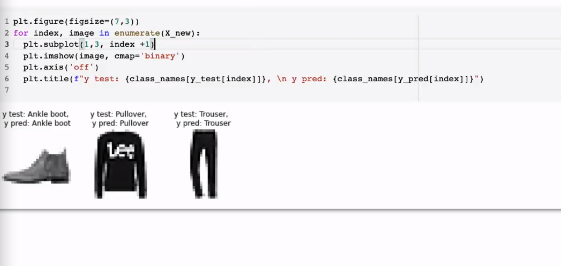